In [3]:
def get_bit(value, bit_index):
    return (value & (1 << bit_index)) >> bit_index

def get_bit_mask(value, bit_index):
    return (value & (1 << bit_index))

def get_hash2(value):
    return get_bit(value, 6) ^ get_bit(value, 7) ^ get_bit(value, 8) ^ get_bit(value, 9) ^ get_bit(value, 10) ^\
get_bit(value, 11) ^ get_bit(value, 12) ^ get_bit(value, 13) ^ get_bit(value, 14) ^ get_bit(value, 15) ^\
get_bit(value, 16) ^ get_bit(value, 17) ^ get_bit(value, 18) ^ get_bit(value, 19) ^ get_bit(value, 20) ^\
get_bit(value, 21) ^ get_bit(value, 22) ^ get_bit(value, 23) ^ get_bit(value, 24) ^ get_bit(value, 25) ^\
get_bit(value, 26) ^ get_bit(value, 27) ^ get_bit(value, 28) ^ get_bit(value, 29) ^ get_bit(value, 30) ^\
get_bit(value, 31) ^ get_bit(value, 32) ^ get_bit(value, 33) ^ get_bit(value, 34) ^ get_bit(value, 35) ^\
get_bit(value, 36) ^ get_bit(value, 37) ^ get_bit(value, 38) ^ get_bit(value, 39) ^ get_bit(value, 40) ^\
get_bit(value, 41) ^ get_bit(value, 42) ^ get_bit(value, 43) ^ get_bit(value, 44) ^ get_bit(value, 45) ^\
get_bit(value, 46) ^ get_bit(value, 47) ^ get_bit(value, 48) ^ get_bit(value, 49) ^ get_bit(value, 50) ^ get_bit(value, 51)


def get_hash4(value):
    return (get_bit(value, 6) ^ get_bit(value, 8) ^ get_bit(value, 10) ^\
get_bit(value, 12) ^ get_bit(value, 14) ^ get_bit(value, 16) ^ get_bit(value, 18) ^ get_bit(value, 20) ^\
get_bit(value, 22) ^ get_bit(value, 24) ^ get_bit(value, 26) ^\
get_bit(value, 28) ^ get_bit(value, 30) ^ get_bit(value, 32) ^ get_bit(value, 34) ^ get_bit(value, 36) ^\
get_bit(value, 38) ^ get_bit(value, 40) ^ get_bit(value, 42) ^ get_bit(value, 44) ^ get_bit(value, 46) ^\
get_bit(value, 48) ^ get_bit(value, 50)) | \
((get_bit(value, 7) ^ get_bit(value, 9) ^ get_bit(value, 11) ^ get_bit(value, 13) ^ get_bit(value, 15) ^\
get_bit(value, 17) ^ get_bit(value, 19) ^ get_bit(value, 21) ^ get_bit(value, 23) ^ get_bit(value, 25) ^\
get_bit(value, 27) ^ get_bit(value, 29) ^ get_bit(value, 31) ^ get_bit(value, 33) ^ get_bit(value, 35) ^\
get_bit(value, 37) ^ get_bit(value, 39) ^ get_bit(value, 41) ^ get_bit(value, 43) ^ get_bit(value, 45) ^\
get_bit(value, 47) ^ get_bit(value, 49) ^ get_bit(value, 51)) << 1)



def get_hash8(value):
    return  get_bit(value, 6) ^  get_bit(value, 9) ^ get_bit(value, 12) ^ get_bit(value, 15) ^\
get_bit(value, 18) ^ get_bit(value, 21) ^ get_bit(value, 24) ^ get_bit(value, 27) ^\
get_bit(value, 30) ^ get_bit(value, 33) ^ get_bit(value, 36) ^ get_bit(value, 39) ^\
get_bit(value, 42) ^ get_bit(value, 45) ^ get_bit(value, 48) ^ get_bit(value, 51) |\
((get_bit(value, 7) ^ get_bit(value, 10) ^ get_bit(value, 13) ^ get_bit(value, 16) ^\
get_bit(value, 19) ^ get_bit(value, 22) ^ get_bit(value, 25) ^ get_bit(value, 28) ^\
get_bit(value, 31) ^ get_bit(value, 34) ^ get_bit(value, 37) ^ get_bit(value, 40) ^\
get_bit(value, 43) ^ get_bit(value, 46) ^ get_bit(value, 49)) << 1) |\
((get_bit(value, 8) ^ get_bit(value, 11) ^ get_bit(value, 14) ^ get_bit(value, 17) ^\
get_bit(value, 20) ^ get_bit(value, 23) ^ get_bit(value, 26) ^ get_bit(value, 29) ^\
get_bit(value, 32) ^ get_bit(value, 35) ^ get_bit(value, 38) ^ get_bit(value, 41) ^\
get_bit(value, 44) ^ get_bit(value, 47) ^ get_bit(value, 50)) << 2)

In [23]:
!echo '123456' | sudo -S /home/steven/bin/perf report -D 

[sudo] password for steven: incompatible file format (rerun with -v to learn more)


In [21]:
%%bash

echo 123456 | sudo -S  /home/steven/bin/perf record -e arm_spe_0/ts_enable=1,pa_enable=1,pct_enable=1,load_filter=1,store_filter=1, jitter=1/ /arm/steven/tests/lmbench-3.0-a9/bin/bw_mem -P 1 1G rdwr
echo 123456 | sudo -S  /home/steven/bin/perf report -D > spe_buf.txt

UsageError: Cell magic `%%cmd` not found.


In [24]:
! grep 'PA ' spe_buf.txt > spe_pa.txt

In [25]:
!awk '{print $13,$14}' spe_pa.txt > spe_pa.csv

In [1]:
import pandas as pd

df = pd.read_csv("spe_pa.csv", names=['PA', 'NS'], header = None, sep=' ')
df.head(5)

,PA,NS
0,0xf337c340,ns=1
1,0x839c207d68,ns=1
2,0x87fbf8e9cc,ns=1
3,0x8083830050,ns=1
4,0x839c2077d0,ns=1


In [6]:
df.PA = df.PA.apply(lambda x: int(x, 16))



In [7]:
df['hashindex'] = df['PA'].apply(lambda x: get_hash4(x))
df.head(100)

,PA,NS,hashindex
0,4080517952,ns=1,3
1,565260090728,ns=1,2
2,584047978956,ns=1,2
3,551962214480,ns=1,3
4,565260089296,ns=1,0
5,552146317120,ns=1,3
6,551913106528,ns=1,1
7,551962214976,ns=1,1
8,551913106960,ns=1,2
9,584048047936,ns=1,1


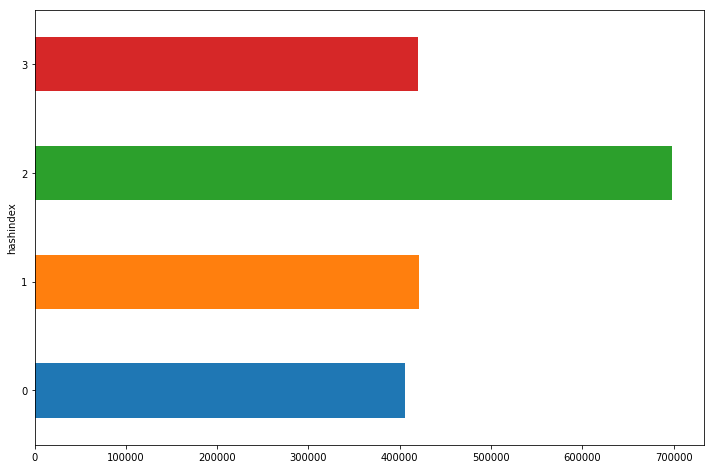

In [9]:
df.groupby("hashindex").size().plot(kind='barh', figsize = (12,8))